IMAGE SEGMENTATION


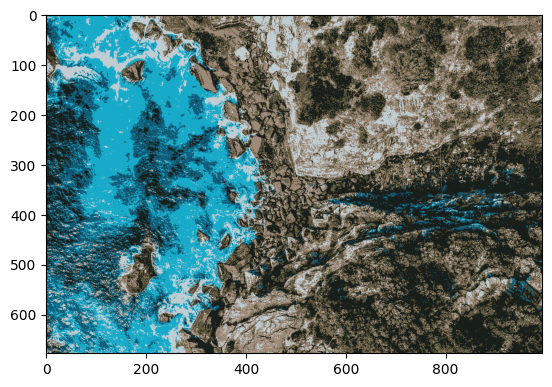

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#Read the image
image = cv2.imread('/content/aerial.png')

#Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

#Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

#Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen if 100 iterations are run or the required accuracy
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#then perform k-means clustering with number of clusters defined as 6
#also random centres are initially choosed for k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)


In [3]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, jaccard_score

davies_bouldin = davies_bouldin_score(pixel_vals, labels)
calinski_harabasz = calinski_harabasz_score(pixel_vals, labels)

print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Davies-Bouldin Index: 0.7647579438355012
Calinski-Harabasz Index: 913991.1608946755
